In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing

train_data = pd.read_csv("../datasets/train.csv")
print('train_data:')
print(train_data.head().to_markdown())
print(train_data.shape)

print('\n\n')

test_data = pd.read_csv("../datasets/test.csv")
print('test_data:')
print(test_data.head().to_markdown())
print(test_data.shape)

print('\n\n')

gender_submission = pd.read_csv("../datasets/gender_submission.csv")
print('gender_submission:')
print(gender_submission.head().to_markdown())
print(gender_submission.shape)

train_data:
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
|---:|--------------:|-----------:|---------:|:----------------------------------------------------|:-------|------:|--------:|--------:|:-----------------|--------:|:--------|:-----------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C85     | C          |
|  2 |             3 |          1 |        3 | Heikkinen, Miss. Laina                              | female |    26 |       0 |       0 | STON/O2. 3101282 |  7.925  | nan     | S          |
|  3 |             4 |          1 |   

In [95]:
# surviving rate by gender

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

print('\n')

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095


% of men who survived: 0.18890814558058924


In [96]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# training the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)

# making predictions
predictions = model.predict(X_test)
y_pred = pd.Series(predictions)
y_test = gender_submission["Survived"]

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Submission successfully saved")

Submission successfully saved


accuracy:  0.97
classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       266
           1       0.97      0.95      0.96       152

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418

cross-validation acuracy:
[0.76536313 0.80337079 0.80898876 0.79213483 0.8258427 ]


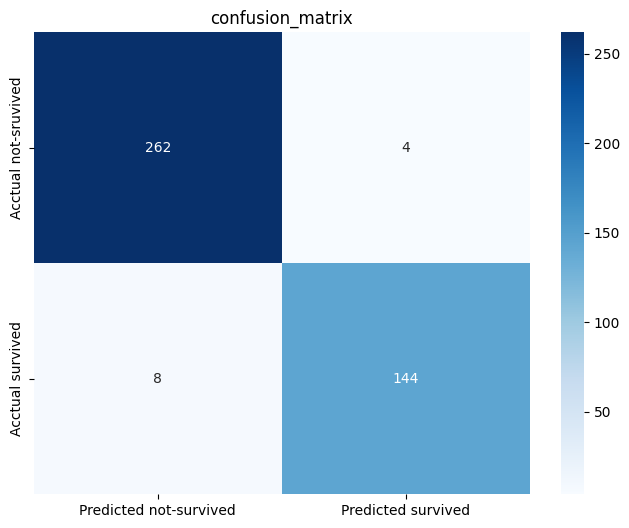

In [98]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy: .2f}')

# classification report
classification_report = classification_report(y_test, y_pred)
print('classification report:')
print(classification_report)

# cross-validation
scores = cross_val_score(model, X, y, cv=5)
print('cross-validation acuracy:')
print(scores)

# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix, index=['Acctual not-sruvived', 'Acctual survived'], columns=['Predicted not-survived', 'Predicted survived'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('confusion_matrix')
plt.show()